# Model `GreConD` and `GreConDPlus`

In [1]:
# use project files rather than the installed PyBMF

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

In [2]:
# # generating synthetic data

# from PyBMF.generators import BlockDiagonalMatrixGenerator

# data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.2])
# data.generate(seed=1000)
# data.add_noise(noise=[0.4, 0.1], seed=2000)

# data.show_matrix(scaling=0.5)

c:\Users\nieht\Anaconda3\envs\pybmf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[I] Found settings.ini at d:\MEGA\PyBMF\examples\settings.ini
[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


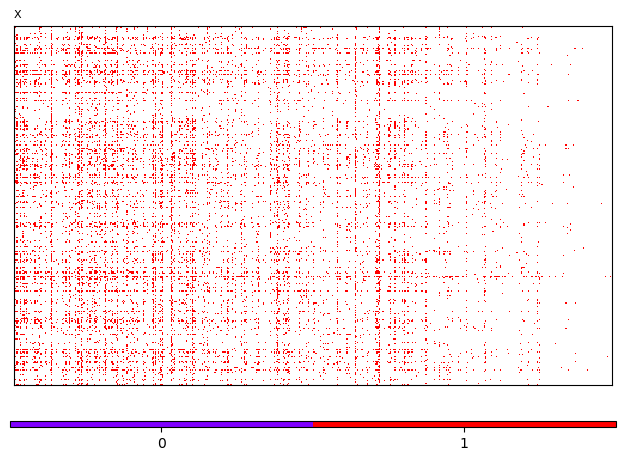

<Figure size 640x480 with 0 Axes>

In [3]:
# loading real-world data

from PyBMF.datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

data.show_matrix(scaling=0.5)

In [4]:
# splitting the data into train, validation and test

from PyBMF.datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)

# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1722006844
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1722006844


# Exact decomposition with `GreConD`

[I] k            : None
[I] tol          : 0.0
[I] verbose      : False
[I] display      : False
[I] save_model   : False
[I] task         : reconstruction
[I]   save_model : False
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-07-26 23-17-17-780270 GreConD
[I] k: 0, score: 209, error: 0.070, shape: [1.0, 209.0]
[I] k: 1, score: 150, error: 0.069, shape: [6.0, 25.0]
[I] k: 2, score: 137, error: 0.068, shape: [1.0, 137.0]
[I] k: 3, score: 186, error: 0.067, shape: [3.0, 62.0]
[I] k: 4, score: 163, error: 0.066, shape: [1.0, 163.0]
[I] k: 5, score: 127, error: 0.065, shape: [3.0, 48.0]
[I] k: 6, score: 177, error: 0.064, shape: [51.0, 4.0]
[I] k: 7, score: 102, error: 0.063, shape: [1.0, 102.0]
[I] k: 8, score: 98, error: 0.063, shape: [1.0, 102.0]
[I] k: 9, score: 103, error: 0.062, shape: [1.0, 103.0]
[I] k: 10, score: 84, error: 0.061, shape: [1.0, 84.0]
[I] k: 11, score: 76, error: 0.061, shape: [1.0, 76.0]
[I] k: 12, score: 50, error: 0.061, shape: [1

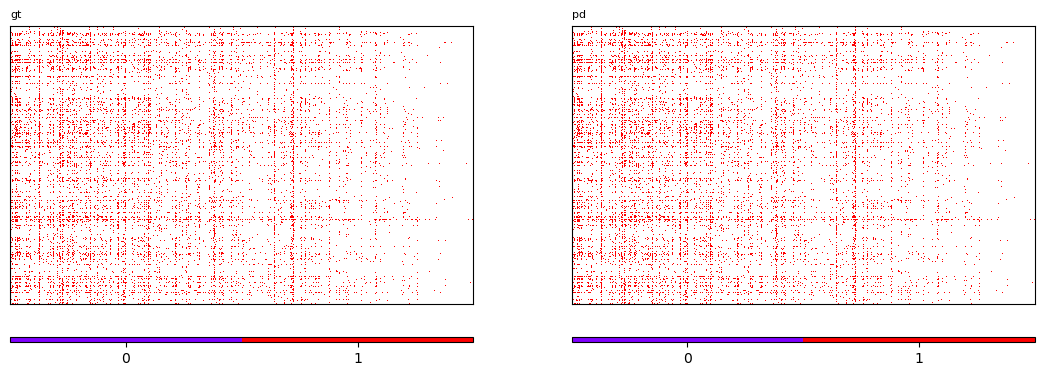

train                      \
                                                        0                       
                  time    k score         shape    Recall Precision  Accuracy   
0    26/07/24 11:17:18    0   209  [1.0, 209.0]  0.019435       1.0  0.929700   
1    26/07/24 11:17:19    1   150   [6.0, 25.0]  0.033383       1.0  0.930700   
2    26/07/24 11:17:20    2   137  [1.0, 137.0]  0.046122       1.0  0.931613   
3    26/07/24 11:17:21    3   186   [3.0, 62.0]  0.063418       1.0  0.932853   
4    26/07/24 11:17:21    4   163  [1.0, 163.0]  0.078575       1.0  0.933940   
5    26/07/24 11:17:22    5   127   [3.0, 48.0]  0.090385       1.0  0.934787   
6    26/07/24 11:17:24    6   177   [51.0, 4.0]  0.106844       1.0  0.935967   
7    26/07/24 11:17:25    7   102  [1.0, 102.0]  0.116329       1.0  0.936647   
8    26/07/24 11:17:25    8    98  [1.0, 102.0]  0.125442       1.0  0.937300   
9    26/07/24 11:17:26    9   103  [1.0, 103.0]  0.135020       1.0  0.937987   
10   26/07/24 11:17:27   10    84   [1.0, 84.0]  0.142831       1.0  0.938547   
11   26/07/24 11:17:28   11    76   [1.0, 76.0]  0.149898       1.0  0.939053   
12   26/07/24 11:17:28   12    50   [1.0, 54.0]  0.154547       1.0  0.939387   
13   26/07/24 11:17:30   13   103  [11.0, 18.0]  0.164125       1.0  0.940073   
14   26/07/24 11:17:31   14    72   [1.0, 90.0]  0.170820       1.0  0.940553   
15   26/07/24 11:17:31   15    74   [1.0, 74.0]  0.177701       1.0  0.941047   
16   26/07/24 11:17:32   16    70   [1.0, 74.0]  0.184211       1.0  0.941513   
17   26/07/24 11:17:33   17    68  [1.0, 124.0]  0.190534       1.0  0.941967   
18   26/07/24 11:17:34   18    88   [1.0, 88.0]  0.198717       1.0  0.942553   
19   26/07/24 11:17:34   19   101  [1.0, 101.0]  0.208109       1.0  0.943227   
20   26/07/24 11:17:35   20   142  [1.0, 142.0]  0.221313       1.0  0.944173   
21   26/07/24 11:17:36   21    71   [1.0, 71.0]  0.227915       1.0  0.944647   
22   26/07/24 11:17:36   22    88   [1.0, 92.0]  0.236098       1.0  0.945233   
23   26/07/24 11:17:37   23    94   [1.0, 98.0]  0.244839       1.0  0.945860   
24   26/07/24 11:17:38   24    91   [1.0, 95.0]  0.253301       1.0  0.946467   
25   26/07/24 11:17:39   25    85   [1.0, 89.0]  0.261205       1.0  0.947033   
26   26/07/24 11:17:39   26    92  [1.0, 118.0]  0.269760       1.0  0.947647   
27   26/07/24 11:17:40   27    90   [1.0, 90.0]  0.278129       1.0  0.948247   
28   26/07/24 11:17:41   28    74   [1.0, 78.0]  0.285010       1.0  0.948740   
29   26/07/24 11:17:42   29    70  [1.0, 133.0]  0.291519       1.0  0.949207   
30   26/07/24 11:17:42   30    67   [1.0, 93.0]  0.297750       1.0  0.949653   
31   26/07/24 11:17:43   31    57  [1.0, 119.0]  0.303050       1.0  0.950033   
32   26/07/24 11:17:44   32    74   [1.0, 78.0]  0.309931       1.0  0.950527   
33   26/07/24 11:17:45   33    71   [1.0, 75.0]  0.316533       1.0  0.951000   
34   26/07/24 11:17:46   34    67  [1.0, 132.0]  0.322764       1.0  0.951447   
35   26/07/24 11:17:47   35    79   [1.0, 97.0]  0.330110       1.0  0.951973   
36   26/07/24 11:17:49   36    64   [30.0, 7.0]  0.336061       1.0  0.952400   
37   26/07/24 11:17:49   37    82   [1.0, 82.0]  0.343686       1.0  0.952947   
38   26/07/24 11:17:50   38    54   [1.0, 58.0]  0.348707       1.0  0.953307   
39   26/07/24 11:17:51   39    51   [1.0, 70.0]  0.353450       1.0  0.953647   
40   26/07/24 11:17:52   40    68   [1.0, 72.0]  0.359773       1.0  0.954100   
41   26/07/24 11:17:53   41    47   [1.0, 47.0]  0.364144       1.0  0.954413   
42   26/07/24 11:17:54   42    32   [1.0, 57.0]  0.367119       1.0  0.954627   
43   26/07/24 11:17:54   43    44   [1.0, 48.0]  0.371211       1.0  0.954920   
44   26/07/24 11:17:55   44    62   [1.0, 62.0]  0.376976       1.0  0.955333   
45   26/07/24 11:17:56   45    74   [1.0, 99.0]  0.383857       1.0  0.955827   
46   26/07/24 11:17:57   46    42   [1.0, 95.0]  0.387763       1.0  0.956107   
47

<Figure size 640x480 with 0 Axes>

In [9]:
from PyBMF.models import GreConD

model = GreConD(k=None, tol=0.0)
model.fit(X_train=X_train, task='reconstruction', verbose=False, display=False, save_model=False)

# Approximate decomposition with `GreConD`

Specify `k` or `tol`, or both.

[I] k            : 50
[I] tol          : 0.0
[I] verbose      : False
[I] display      : False
[I] save_model   : False
[I] task         : reconstruction
[I]   save_model : False
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-07-26 23-24-41-835126 GreConD
[I] k: 0, score: 209, error: 0.070, shape: [1.0, 209.0]
[I] k: 1, score: 150, error: 0.069, shape: [6.0, 25.0]
[I] k: 2, score: 137, error: 0.068, shape: [1.0, 137.0]
[I] k: 3, score: 186, error: 0.067, shape: [3.0, 62.0]
[I] k: 4, score: 163, error: 0.066, shape: [1.0, 163.0]
[I] k: 5, score: 127, error: 0.065, shape: [3.0, 48.0]
[I] k: 6, score: 177, error: 0.064, shape: [51.0, 4.0]
[I] k: 7, score: 102, error: 0.063, shape: [1.0, 102.0]
[I] k: 8, score: 98, error: 0.063, shape: [1.0, 102.0]
[I] k: 9, score: 103, error: 0.062, shape: [1.0, 103.0]
[I] k: 10, score: 84, error: 0.061, shape: [1.0, 84.0]
[I] k: 11, score: 76, error: 0.061, shape: [1.0, 76.0]
[I] k: 12, score: 50, error: 0.061, shape: [1.0

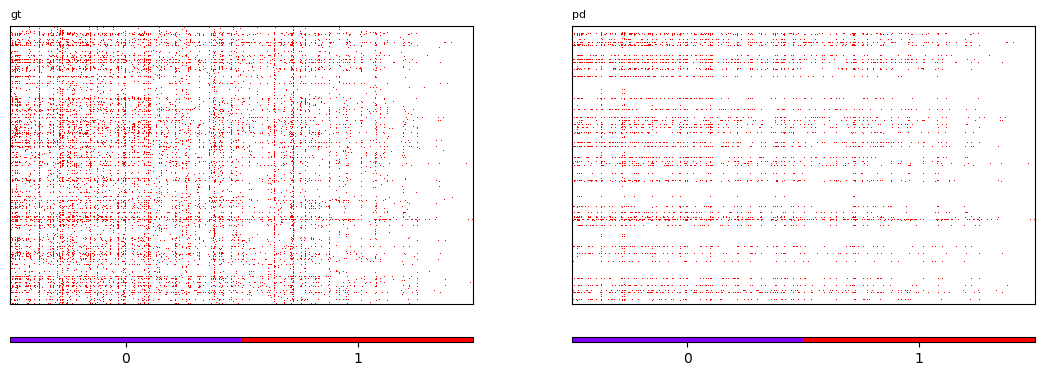

train                      \
                                                      0                       
                 time   k score         shape    Recall Precision  Accuracy   
0   26/07/24 11:24:42   0   209  [1.0, 209.0]  0.019435       1.0  0.929700   
1   26/07/24 11:24:43   1   150   [6.0, 25.0]  0.033383       1.0  0.930700   
2   26/07/24 11:24:44   2   137  [1.0, 137.0]  0.046122       1.0  0.931613   
3   26/07/24 11:24:45   3   186   [3.0, 62.0]  0.063418       1.0  0.932853   
4   26/07/24 11:24:45   4   163  [1.0, 163.0]  0.078575       1.0  0.933940   
5   26/07/24 11:24:46   5   127   [3.0, 48.0]  0.090385       1.0  0.934787   
6   26/07/24 11:24:48   6   177   [51.0, 4.0]  0.106844       1.0  0.935967   
7   26/07/24 11:24:48   7   102  [1.0, 102.0]  0.116329       1.0  0.936647   
8   26/07/24 11:24:49   8    98  [1.0, 102.0]  0.125442       1.0  0.937300   
9   26/07/24 11:24:50   9   103  [1.0, 103.0]  0.135020       1.0  0.937987   
10  26/07/24 11:24:51  10    84   [1.0, 84.0]  0.142831       1.0  0.938547   
11  26/07/24 11:24:51  11    76   [1.0, 76.0]  0.149898       1.0  0.939053   
12  26/07/24 11:24:52  12    50   [1.0, 54.0]  0.154547       1.0  0.939387   
13  26/07/24 11:24:54  13   103  [11.0, 18.0]  0.164125       1.0  0.940073   
14  26/07/24 11:24:54  14    72   [1.0, 90.0]  0.170820       1.0  0.940553   
15  26/07/24 11:24:55  15    74   [1.0, 74.0]  0.177701       1.0  0.941047   
16  26/07/24 11:24:56  16    70   [1.0, 74.0]  0.184211       1.0  0.941513   
17  26/07/24 11:24:57  17    68  [1.0, 124.0]  0.190534       1.0  0.941967   
18  26/07/24 11:24:57  18    88   [1.0, 88.0]  0.198717       1.0  0.942553   
19  26/07/24 11:24:58  19   101  [1.0, 101.0]  0.208109       1.0  0.943227   
20  26/07/24 11:24:59  20   142  [1.0, 142.0]  0.221313       1.0  0.944173   
21  26/07/24 11:24:59  21    71   [1.0, 71.0]  0.227915       1.0  0.944647   
22  26/07/24 11:25:00  22    88   [1.0, 92.0]  0.236098       1.0  0.945233   
23  26/07/24 11:25:01  23    94   [1.0, 98.0]  0.244839       1.0  0.945860   
24  26/07/24 11:25:01  24    91   [1.0, 95.0]  0.253301       1.0  0.946467   
25  26/07/24 11:25:02  25    85   [1.0, 89.0]  0.261205       1.0  0.947033   
26  26/07/24 11:25:03  26    92  [1.0, 118.0]  0.269760       1.0  0.947647   
27  26/07/24 11:25:04  27    90   [1.0, 90.0]  0.278129       1.0  0.948247   
28  26/07/24 11:25:04  28    74   [1.0, 78.0]  0.285010       1.0  0.948740   
29  26/07/24 11:25:05  29    70  [1.0, 133.0]  0.291519       1.0  0.949207   
30  26/07/24 11:25:06  30    67   [1.0, 93.0]  0.297750       1.0  0.949653   
31  26/07/24 11:25:07  31    57  [1.0, 119.0]  0.303050       1.0  0.950033   
32  26/07/24 11:25:08  32    74   [1.0, 78.0]  0.309931       1.0  0.950527   
33  26/07/24 11:25:08  33    71   [1.0, 75.0]  0.316533       1.0  0.951000   
34  26/07/24 11:25:09  34    67  [1.0, 132.0]  0.322764       1.0  0.951447   
35  26/07/24 11:25:10  35    79   [1.0, 97.0]  0.330110       1.0  0.951973   
36  26/07/24 11:25:12  36    64   [30.0, 7.0]  0.336061       1.0  0.952400   
37  26/07/24 11:25:13  37    82   [1.0, 82.0]  0.343686       1.0  0.952947   
38  26/07/24 11:25:14  38    54   [1.0, 58.0]  0.348707       1.0  0.953307   
39  26/07/24 11:25:15  39    51   [1.0, 70.0]  0.353450       1.0  0.953647   
40  26/07/24 11:25:15  40    68   [1.0, 72.0]  0.359773       1.0  0.954100   
41  26/07/24 11:25:16  41    47   [1.0, 47.0]  0.364144       1.0  0.954413   
42  26/07/24 11:25:17  42    32   [1.0, 57.0]  0.367119       1.0  0.954627   
43  26/07/24 11:25:18  43    44   [1.0, 48.0]  0.371211       1.0  0.954920   
44  26/07/24 11:25:18  44    62   [1.0, 62.0]  0.376976       1.0  0.955333   
45  26/07/24 11:25:19  45    74   [1.0, 99.0]  0.383857       1.0  0.955827   
46  26/07/24 11:25:20  46    42   [1.0, 95.0]  0.387763       1.0  0.956107   
47  26/07/24 11:25:21  47    42   [1.0, 49.0]  0.391668       1.0  0.956387   
48  26/07/24 11:25:22

<Figure size 640x480 with 0 Axes>

In [12]:
from PyBMF.models import GreConD

model = GreConD(k=50, tol=0.0)
model.fit(X_train=X_train, task='reconstruction', verbose=False, display=False, save_model=False)

# Approximate decomposition with `GreConDPlus`

Tunable `w_fp` and `w_fn`.

[I] k            : 50
[I] tol          : 0.0
[I] w_fp         : 0.8
[I] w_fn         : 0.2
[I] verbose      : False
[I] display      : False
[I] save_model   : False
[I] task         : reconstruction
[I]   save_model : False
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-07-26 23-26-03-235301 GreConDPlus
[I]     expansion() finished after 1 iterations.
[I]     remove_covered() finished with 49 patterns removed.
[I] k: 0, score: 209, error: 0.070, shape: [1.0, 209.0]
[I]     expansion() finished after 2 iterations.
[I]     remove_covered() finished with 0 patterns removed.
[I] k: 1, score: 150, error: 0.069, shape: [7.0, 25.0]
[I]     expansion() finished after 1 iterations.
[I]     remove_covered() finished with 0 patterns removed.
[I] k: 2, score: 137, error: 0.068, shape: [1.0, 137.0]
[I]     expansion() finished after 2 iterations.
[I]     remove_covered() finished with 0 patterns removed.
[I] k: 3, score: 186, error: 0.067, shape: [4.0, 62.0]
[I]    

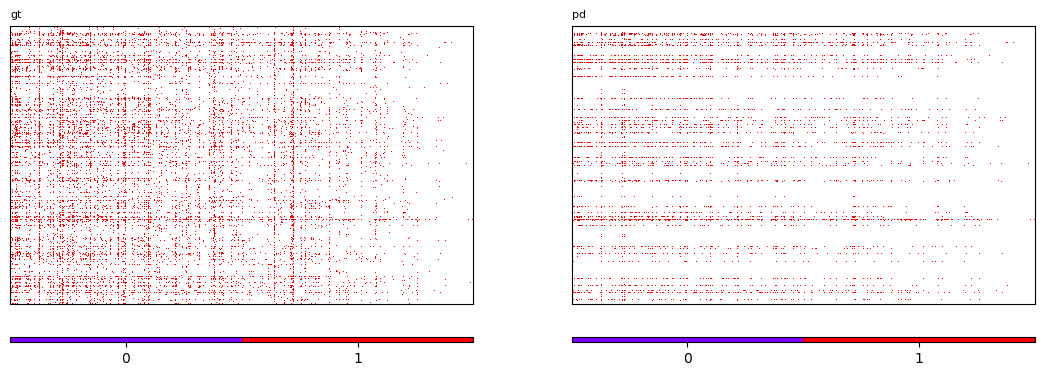

train                      \
                                                      0                       
                 time   k score         shape    Recall Precision  Accuracy   
0   26/07/24 11:26:04   0   209  [1.0, 209.0]  0.019435  1.000000  0.929700   
1   26/07/24 11:26:05   1   150   [7.0, 25.0]  0.033383  0.988981  0.930673   
2   26/07/24 11:26:05   2   137  [1.0, 137.0]  0.046122  0.992000  0.931587   
3   26/07/24 11:26:06   3   186   [4.0, 62.0]  0.063418  0.977077  0.932747   
4   26/07/24 11:26:07   4   163  [1.0, 163.0]  0.078575  0.981417  0.933833   
5   26/07/24 11:26:08   5   127   [5.0, 48.0]  0.090385  0.976884  0.934633   
6   26/07/24 11:26:09   6   177   [51.0, 4.0]  0.106844  0.980375  0.935813   
7   26/07/24 11:26:10   7   102  [1.0, 102.0]  0.116329  0.981947  0.936493   
8   26/07/24 11:26:11   8    98  [1.0, 102.0]  0.125442  0.983236  0.937147   
9   26/07/24 11:26:12   9   103  [1.0, 103.0]  0.135020  0.984407  0.937833   
10  26/07/24 11:26:13  10    84   [1.0, 84.0]  0.142831  0.985247  0.938393   
11  26/07/24 11:26:13  11    76   [1.0, 76.0]  0.149898  0.985933  0.938900   
12  26/07/24 11:26:14  12    50   [1.0, 54.0]  0.154547  0.986350  0.939233   
13  26/07/24 11:26:16  13   103  [21.0, 21.0]  0.167473  0.974040  0.939993   
14  26/07/24 11:26:17  14    72   [2.0, 90.0]  0.174168  0.968459  0.940387   
15  26/07/24 11:26:18  15    74   [1.0, 74.0]  0.181049  0.969622  0.940880   
16  26/07/24 11:26:18  16    70   [1.0, 74.0]  0.187558  0.970645  0.941347   
17  26/07/24 11:26:19  17    67  [1.0, 124.0]  0.193788  0.971562  0.941793   
18  26/07/24 11:26:20  18    88   [1.0, 88.0]  0.201971  0.972682  0.942380   
19  26/07/24 11:26:21  19   101  [1.0, 101.0]  0.211363  0.973865  0.943053   
20  26/07/24 11:26:22  20   142  [1.0, 142.0]  0.224568  0.975363  0.944000   
21  26/07/24 11:26:22  21    85   [2.0, 89.0]  0.232472  0.971251  0.944480   
22  26/07/24 11:26:23  22    74   [2.0, 78.0]  0.239353  0.969127  0.944920   
23  26/07/24 11:26:24  23    71   [1.0, 71.0]  0.245955  0.969930  0.945393   
24  26/07/24 11:26:25  24    91   [1.0, 95.0]  0.254417  0.970901  0.946000   
25  26/07/24 11:26:26  25    94   [1.0, 98.0]  0.263158  0.971841  0.946627   
26  26/07/24 11:26:27  26    88   [1.0, 92.0]  0.271341  0.972667  0.947213   
27  26/07/24 11:26:27  27    90   [1.0, 90.0]  0.279710  0.973463  0.947813   
28  26/07/24 11:26:28  28    61   [1.0, 93.0]  0.285382  0.973977  0.948220   
29  26/07/24 11:26:29  29    74   [1.0, 78.0]  0.292263  0.974574  0.948713   
30  26/07/24 11:26:30  30    46   [1.0, 96.0]  0.296541  0.974931  0.949020   
31  26/07/24 11:26:31  31    71   [1.0, 75.0]  0.303143  0.975464  0.949493   
32  26/07/24 11:26:32  32    67  [1.0, 132.0]  0.309373  0.975946  0.949940   
33  26/07/24 11:26:33  33    76   [1.0, 97.0]  0.316440  0.976471  0.950447   
34  26/07/24 11:26:35  34    69  [1.0, 133.0]  0.322857  0.976927  0.950907   
35  26/07/24 11:26:37  35    64   [31.0, 9.0]  0.329831  0.975254  0.951353   
36  26/07/24 11:26:38  36    82   [1.0, 82.0]  0.337456  0.975800  0.951900   
37  26/07/24 11:26:39  37    86  [1.0, 118.0]  0.345453  0.976347  0.952473   
38  26/07/24 11:26:40  38    56  [1.0, 119.0]  0.350660  0.976690  0.952847   
39  26/07/24 11:26:41  39    54   [1.0, 58.0]  0.355682  0.977011  0.953207   
40  26/07/24 11:26:42  40    50   [2.0, 70.0]  0.360331  0.975825  0.953500   
41  26/07/24 11:26:42  41    68   [1.0, 72.0]  0.366654  0.976232  0.953953   
42  26/07/24 11:26:43  42    47   [1.0, 47.0]  0.371025  0.976505  0.954267   
43  26/07/24 11:26:44  43    32   [1.0, 57.0]  0.374000  0.976688  0.954480   
44  26/07/24 11:26:45  44    44   [1.0, 48.0]  0.378092  0.976934  0.954773   
45  26/07/24 11:26:46  45    62   [1.0, 62.0]  0.383857  0.977273  0.955187   
46  26/07/24 11:26:47  46    42   [1.0, 95.0]  0.387763  0.977496  0.955467   
47  26/07/24 11:26:49  47    40   [43.0, 5.0]  0.391947  0.976372  0.955727   
48  26/07/24 11:26:50

<Figure size 640x480 with 0 Axes>

: 

In [13]:
from PyBMF.models import GreConDPlus

model = GreConDPlus(k=50, tol=0.0, w_fp=0.8, w_fn=0.2)
model.fit(X_train=X_train, task='reconstruction', verbose=False, display=False, save_model=False)